# The Spark Foundation Task-3

## Create the Decision Tree classifier and visualize it graphically.

## import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

## load iris dataset

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Check shape

In [4]:
iris.shape

(150, 6)

## Check there is null value of not

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## check description

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## check info

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

## label encoding on categorical feature(species)

In [9]:
label = LabelEncoder()
label.fit_transform(iris['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris['Species_lbl'] = label.fit_transform(iris['Species'])

In [11]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_lbl
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


## drop unneccesory features

In [12]:
iris.drop(columns=['Id','Species'],axis=1,inplace=True)

In [13]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_lbl
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## prepare data

In [14]:
X = iris.drop('Species_lbl',axis=1)
y = iris['Species_lbl']

## split data into train and test

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=51)

In [16]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((135, 4), (15, 4), (135,), (15,))

## define model

In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## test model

In [19]:
pred = model.predict(X_test)

In [20]:
pred

array([1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2])

In [21]:
y_test

78     1
121    2
99     1
36     0
92     1
107    2
131    2
144    2
10     0
126    2
127    2
4      0
73     1
123    2
136    2
Name: Species_lbl, dtype: int32

## Difference between the actual and predicted value

In [22]:
data = pd.DataFrame(np.c_[pred,y_test],columns=['Predicted','Actual'])

In [23]:
data

,Predicted,Actual
0,1,1
1,2,2
2,1,1
3,0,0
4,1,1
5,2,2
6,2,2
7,2,2
8,0,0
9,2,2


## check accuracy

In [24]:
model.score(X_test,y_test)

1.0

## Visualize Decision Tree using graphviz

graphviz installation  and running guide
1. Go to this size => https://graphviz.org/download/
2. download this file => 2.46.1 EXE installer for Windows 10 (64-bit):: stable_windows_10_cmake_Release_x64_graphviz-install-2.46.1-win64.exe
3. install it 
4. set Environment variable

    Windows 10 and Windows 8
    a. In Search, search for and then select: System (Control Panel).
    
    b. Click the Advanced system settings link.
    
    c. Click Environment Variables. In the section System Variables find the PATH environment variable and select it. Click            Edit. If the PATH environment variable does not exist, click New.
    
    d. In the Edit System Variable (or New System Variable) window, specify the value of the PATH environment variable. Click       OK.
    
    e. Close all remaining windows by clicking OK.
    
    f. Reopen Command prompt window or restart system, and run your code.
    

5. where you install the graphviz ,goto that path and go into the bin folder and copy two thing 1. (ex: "C:\Program Files\Graphviz\bin") and 2. (ex: "C:\Program Files\Graphviz\bin\dot.exe").
   and paste into the path of environment variable.

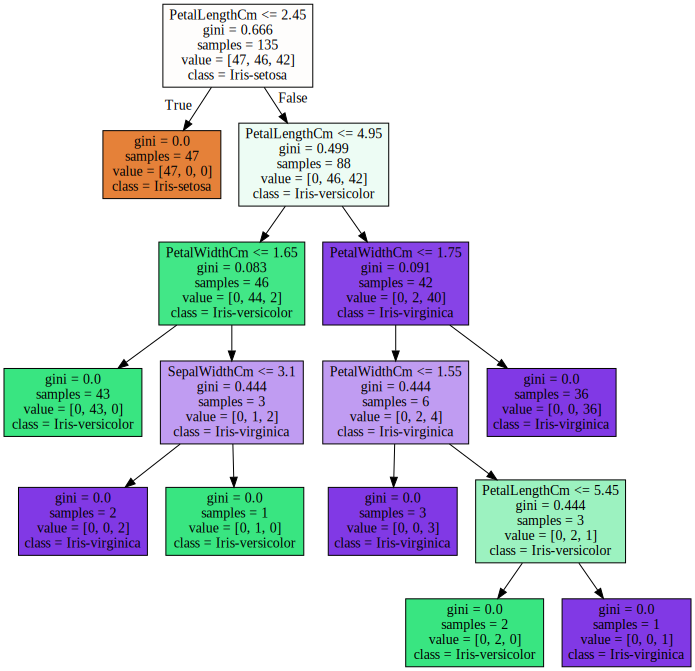

In [25]:
import graphviz

# DOT data
feature_names = ['SepalLengthCm', 'SepalWidthCm' , 'PetalLengthCm' , 'PetalWidthCm']
class_names = ['Iris-setosa' ,'Iris-versicolor' , 'Iris-virginica' ]

dot_data = tree.export_graphviz(model,
                                feature_names=feature_names,
                                class_names=class_names,
                                filled='True')

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Thank You !!!!
